In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_curve, auc
from joblib import load
import warnings
warnings.filterwarnings('ignore')

In [2]:
X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled = load('../../analysis and preprocessing/classification_preprocessed.joblib')

In [3]:
def cnf_matrix(y_pred_test, colormap): 
    conf_matrix = confusion_matrix(y_test, y_pred_test)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, 
                                        display_labels=[False, True])
    
    cm_display = cm_display.plot(cmap=colormap, values_format='g')


In [4]:
params = {
    'C' : range(1, 3, 2),
}

In [5]:
lin = LinearSVC()
grid = GridSearchCV(estimator=lin, 
                    param_grid=params, 
                    cv = 5, 
                    verbose = 8)
grid.fit(X_train_scaled, y_train)
grid.best_params_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ...............................C=1;, score=0.891 total time=   2.4s
[CV 2/5] END ...............................C=1;, score=0.894 total time=   2.2s
[CV 3/5] END ...............................C=1;, score=0.883 total time=   2.4s
[CV 4/5] END ...............................C=1;, score=0.871 total time=   2.3s
[CV 5/5] END ...............................C=1;, score=0.879 total time=   2.4s


{'C': 1}

In [6]:
svm_linear = LinearSVC(loss = 'hinge', C = 1.0)
svm_linear.fit(X_train_scaled, y_train)

LinearSVC(loss='hinge')

Train result: 0.8885150812064965
Test result: 0.8825439783491205

               precision    recall  f1-score   support

           0       0.89      0.98      0.93      3123
           1       0.75      0.37      0.49       572

    accuracy                           0.88      3695
   macro avg       0.82      0.67      0.71      3695
weighted avg       0.87      0.88      0.87      3695



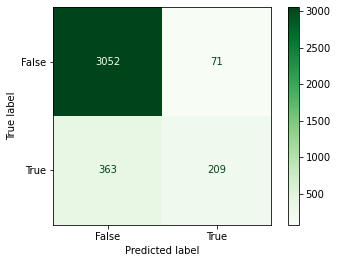

In [7]:
y_pred_train = svm_linear.predict(X_train_scaled)
y_pred_test = svm_linear.predict(X_test_scaled)
    
train_result = accuracy_score(y_train, y_pred_train)
print("Train result:", train_result)
test_result = accuracy_score(y_test, y_pred_test)
print("Test result:", test_result)
print("\n", classification_report(y_test, y_pred_test))

cnf_matrix(y_pred_test, plt.cm.Greens)

### Sada sa balansiranjem klasa

In [8]:
oversample = SMOTE(random_state = 2, sampling_strategy = 'minority')
X_train_smote, y_train = oversample.fit_resample(X_train_scaled, y_train.ravel())

In [9]:
params_smt = {
    'C' : range(1, 3, 2),
}

In [10]:
lin_smt = LinearSVC()
grid_smt = GridSearchCV(estimator=lin_smt, 
                        param_grid=params_smt, 
                        cv = 5, 
                        verbose = 8)
grid_smt.fit(X_train_smote, y_train)
grid_smt.best_params_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ...............................C=1;, score=0.810 total time=   4.0s
[CV 2/5] END ...............................C=1;, score=0.836 total time=   3.9s
[CV 3/5] END ...............................C=1;, score=0.844 total time=   4.4s
[CV 4/5] END ...............................C=1;, score=0.832 total time=   4.4s
[CV 5/5] END ...............................C=1;, score=0.835 total time=   5.5s


{'C': 1}

In [11]:
svm_linear_smt = LinearSVC(loss = 'hinge', C = 1.0)
svm_linear_smt.fit(X_train_smote, y_train)

LinearSVC(loss='hinge')

Train result: 0.8591133681032116
Test result: 0.8822733423545331

               precision    recall  f1-score   support

           0       0.95      0.91      0.93      3123
           1       0.60      0.73      0.66       572

    accuracy                           0.88      3695
   macro avg       0.77      0.82      0.79      3695
weighted avg       0.89      0.88      0.89      3695



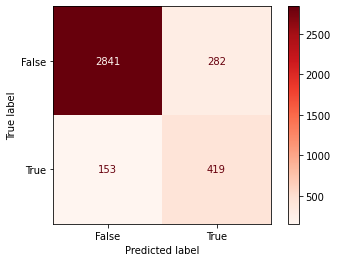

In [12]:
y_pred_train_smt = svm_linear_smt.predict(X_train_smote)
y_pred_test_smt = svm_linear_smt.predict(X_test_scaled)
    
train_result_smt = accuracy_score(y_train, y_pred_train_smt)
print("Train result:", train_result_smt)
test_result_smt = accuracy_score(y_test, y_pred_test_smt)
print("Test result:", test_result_smt)
print("\n", classification_report(y_test, y_pred_test_smt))

cnf_matrix(y_pred_test_smt, plt.cm.Reds)

In [13]:
fpr_svm_lin, tpr_svm_lin, threshold_svm_lin = roc_curve(y_test, y_pred_test)
roc_auc_svm_lin = auc(fpr_svm_lin, tpr_svm_lin)

In [14]:
fpr_svm_lin_smt, tpr_svm_lin_smt, threshold_svm_lin_smt = roc_curve(y_test, y_pred_test_smt)
roc_auc_svm_lin_smt = auc(fpr_svm_lin_smt, tpr_svm_lin_smt)

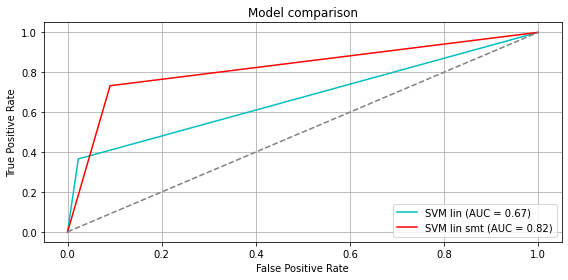

In [15]:
fig = plt.figure(figsize=(8, 4))

plt.plot(fpr_svm_lin, tpr_svm_lin, color='c', label = 'SVM lin (AUC = %0.2f)' % roc_auc_svm_lin)
plt.plot(fpr_svm_lin_smt, tpr_svm_lin_smt, color='r', label = 'SVM lin smt (AUC = %0.2f)' % roc_auc_svm_lin_smt)

plt.grid()
plt.title("Model comparison")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.tight_layout()
plt.show()

In [16]:
%store fpr_svm_lin
%store tpr_svm_lin
%store threshold_svm_lin
%store roc_auc_svm_lin

Stored 'fpr_svm_lin' (ndarray)
Stored 'tpr_svm_lin' (ndarray)
Stored 'threshold_svm_lin' (ndarray)
Stored 'roc_auc_svm_lin' (float64)


In [17]:
%store fpr_svm_lin_smt
%store tpr_svm_lin_smt
%store threshold_svm_lin_smt
%store roc_auc_svm_lin_smt

Stored 'fpr_svm_lin_smt' (ndarray)
Stored 'tpr_svm_lin_smt' (ndarray)
Stored 'threshold_svm_lin_smt' (ndarray)
Stored 'roc_auc_svm_lin_smt' (float64)
